# Exploratory Data Analysis (EDA) Questions
## Overview
**1. What is the timeframe of the dataset? (Start and end date)**

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display

sns.set_style('whitegrid')

#Loading the data
posh = pd.read_csv('poshem_business_school_sales.csv')
#Show the top 4 rows of the data including the columns
display(posh.head())

# Timeframe of the dataset
posh['Order Date'] = pd.to_datetime(posh['Order Date'], format = '%d/%m/%Y')
posh['Ship Date'] = pd.to_datetime(posh['Ship Date'], format = '%d/%m/%Y')
timeframe_ord = posh['Order Date'].max() - posh['Order Date'].min()
print(f'The timeframe of the dataset is: {timeframe_ord.days} days') 


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


The timeframe of the dataset is: 1457 days


**2. How many rows and columns are there in the dataset?**

In [184]:
#The shape of the data i.e. the number of columns and rows
shape = posh.shape
no_of_columns = shape[1] 
no_of_rows = shape[0] 
print(f'no_of_columns: {no_of_columns}')
print(f'no_of_rows: {no_of_rows}')

no_of_columns: 18
no_of_rows: 9800


**3. Are there missing values? If yes list them and fix them**

In [185]:
# Checking for Missing Values in each column
no_of_mv = posh.isna().sum() #Only Postal Code has 11 missing values 
print(no_of_mv)
no_of_mv_post = posh['Postal Code'].isna().sum()
missing_portion = posh[posh['Postal Code'].isna()]
display(missing_portion)
posh = posh.sort_values(['City', 'State']) 
print(f'The number of missing values in the dataset is {no_of_mv_post} from the Postal Code column')

#Noted that Burlington Vermount East had the missing Postal code, checked the web for it and filled
posh['Postal Code'] = posh['Postal Code'].fillna('05405').astype('int')
no_of_mv_post_new = posh['Postal Code'].isna().sum()
print(f'After fixing, the number of missing values in the dataset is {no_of_mv_post_new}')

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


The number of missing values in the dataset is 11 from the Postal Code column
After fixing, the number of missing values in the dataset is 0


**4. What are the data types of each column?**

In [186]:
# The data types of each column in the Dataset
d_types = posh.dtypes
print(f'The data types of each column is \n{d_types}')

The data types of each column is 
Row ID                    int64
Order ID                    str
Order Date       datetime64[us]
Ship Date        datetime64[us]
Ship Mode                   str
Customer ID                 str
Customer Name               str
Segment                     str
Country                     str
City                        str
State                       str
Postal Code               int64
Region                      str
Product ID                  str
Category                    str
Sub-Category                str
Product Name                str
Sales                   float64
dtype: object


**5. Are there duplicates in the dataset? If yes list them and fix them**

In [187]:
#Checking for Duplicates
dupli = posh.duplicated() 
dupli_no = posh.duplicated().sum() 
print(f'The number of duplicated rows are {dupli_no}')


# Dropping Duplicate rows incase there is any
posh.drop_duplicates(keep = 'first', inplace = True)

posh = posh.reset_index(drop = True)


The number of duplicated rows are 0


**6. Give a quick statistical description of numerical contents in the dataset**

In [188]:
# Prints the Statistical description of numerical column
statis = posh.describe()
print(f'The Statistical Description of the Data \n {statis}')

The Statistical Description of the Data 
             Row ID                  Order Date                   Ship Date  \
count  9800.000000                        9800                        9800   
mean   4900.500000  2017-05-01 05:13:51.673469  2017-05-05 04:17:52.653061   
min       1.000000         2015-01-03 00:00:00         2015-01-07 00:00:00   
25%    2450.750000         2016-05-24 00:00:00         2016-05-27 18:00:00   
50%    4900.500000         2017-06-26 00:00:00         2017-06-29 00:00:00   
75%    7350.250000         2018-05-15 00:00:00         2018-05-19 00:00:00   
max    9800.000000         2018-12-30 00:00:00         2019-01-05 00:00:00   
std    2829.160653                         NaN                         NaN   

        Postal Code         Sales  
count   9800.000000   9800.000000  
mean   55217.347755    230.769059  
min     1040.000000      0.444000  
25%    23223.000000     17.248000  
50%    57551.000000     54.490000  
75%    90008.000000    210.605000  
max

##  Order Statistics
**1. How many unique orders are there in the dataset?**

In [189]:
#Number of unique orders
unique_orders = posh['Order ID'].nunique() 
print(f'The number of unique orders are {unique_orders}') 

The number of unique orders are 4922


**2. What is the distribution of order statuses (e.g. delivered, pending)?**

In [190]:
print(f'There is no column for Order Status, can\'t figure it out')

There is no column for Order Status, can't figure it out


**3. How many unique customers are there?**

In [191]:
#Number of Unique customers
unique_customers = posh['Customer ID'].nunique() 
print(f'The number of unique customers are {unique_customers}') 

The number of unique customers are 793


##  Geographical Insights
**1. Which countries are included in the dataset?**

In [192]:
# Countries in the dataset
countries = posh['Country'].unique()
print(f'The country included in this dataset is {countries[0]}') 

The country included in this dataset is United States


**2. What is the distribution of orders across different regions?**

The distribution of the different regions is 
Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64
This can also be visualised in the graph below


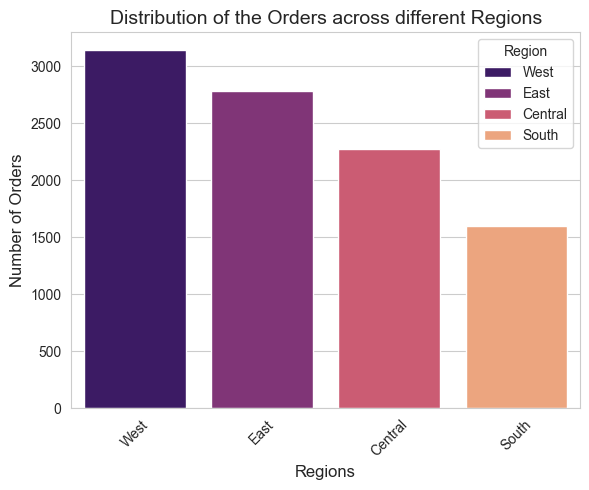

In [193]:
# Distribution of the orders across different regions
dist = posh['Region'].value_counts(ascending = False)
print(f'The distribution of the different regions is \n{dist}')

#Visualizing..
print(f'This can also be visualised in the graph below')
plt.figure(figsize = (6, 5))
sns.barplot(x = dist.index, y = dist.values, hue = dist.index, legend=True, palette = 'magma')
plt.title('Distribution of the Orders across different Regions', fontsize = 14)
plt.xlabel('Regions', fontsize = 12)
plt.ylabel('Number of Orders', fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**3. Can you identify the top 5 cities with the highest number of orders?**

The top 5 cities with the highest number of orders is 
 City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Name: count, dtype: int64
This can also be visualised in the graph below


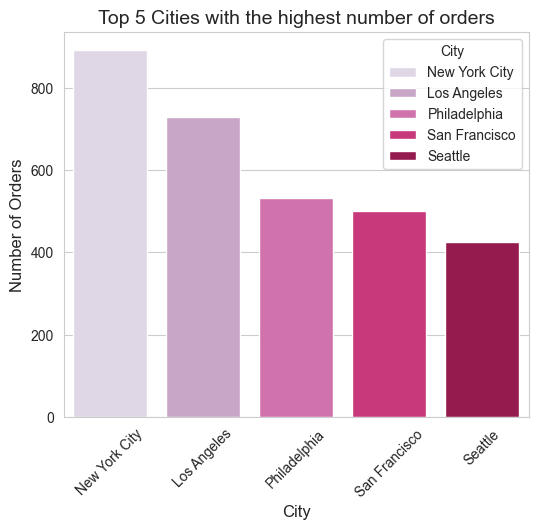

In [194]:
# Top 5 cities with the highest number of orders
top = posh['City'].value_counts(ascending = False)
top_5_cities = top.head(5)
print(f'The top 5 cities with the highest number of orders is \n {top_5_cities}') 

#Visualizing...
print(f'This can also be visualised in the graph below')
plt.figure(figsize = (6, 5))
sns.barplot(x = top_5_cities.index, y = top_5_cities.values, hue = top_5_cities.index, legend = True, palette = 'PuRd')
plt.title('Top 5 Cities with the highest number of orders', fontsize = 14)
plt.xlabel('City', fontsize = 12)
plt.ylabel('Number of Orders', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

##  Product Categories
**1. How many unique product categories are there?**

In [195]:
# To see the number of unique product categories and sub-categories
unique_product_categories = posh['Category'].nunique()
print(f'The number of unique product categories are {unique_product_categories}')

unique_product_sub_categories = posh['Sub-Category'].nunique()
print(f'The number of unique product sub-categories are {unique_product_sub_categories}')

# To see the unique product categories and sub-categories
#unique_product_categories = posh['Category'].unique()
#print(unique_product_categories)

#unique_product_sub_categories = posh['Sub-Category'].unique()
#print(unique_product_sub_categories)

The number of unique product categories are 3
The number of unique product sub-categories are 17


**2. What are the most popular product categories based on sales?**

The most popular product categories according to sales are 
Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64
This can also be visualised in the graph below


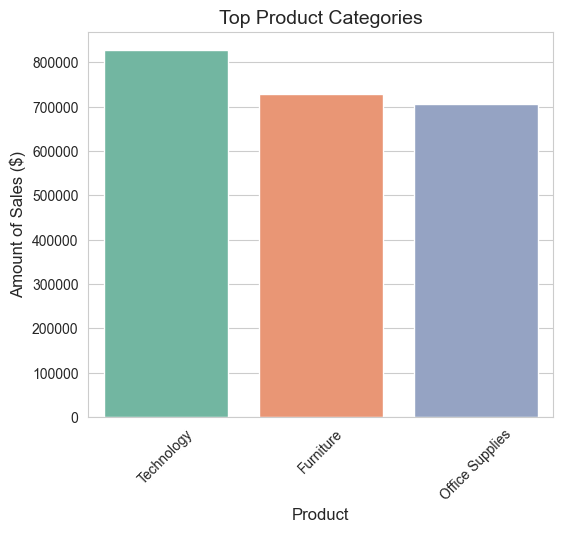

The most popular product sub-categories according to sales are 
Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Furnishings     89212.0180
Paper           76828.3040
Supplies        46420.3080
Art             26705.4100
Envelopes       16128.0460
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64


In [196]:
# Most popular product categories and sub-categories according to sales
pop_prod = posh.groupby('Category')['Sales'].sum().sort_values(ascending = False)
print(f'The most popular product categories according to sales are \n{pop_prod}')

#Visualizing...
print(f'This can also be visualised in the graph below')
plt.figure(figsize = (6, 5))
sns.barplot(x = pop_prod.index, y = pop_prod.values, hue = pop_prod.index, palette = 'Set2')
plt.title('Top Product Categories', fontsize = 14)
plt.xlabel('Product', fontsize = 12)
plt.ylabel('Amount of Sales ($)', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

pop_prod_sub = posh.groupby('Sub-Category')['Sales'].sum().sort_values(ascending = False)
print(f'The most popular product sub-categories according to sales are \n{pop_prod_sub}') 

**3. Can you identify the top 5 selling products?**

The top 5 selling products are 
Product Name
Staple envelope            47
Staples                    46
Easy-staple paper          44
Avery Non-Stick Binders    20
Staple remover             18
Name: count, dtype: int64
This can also be visualised in the graph below


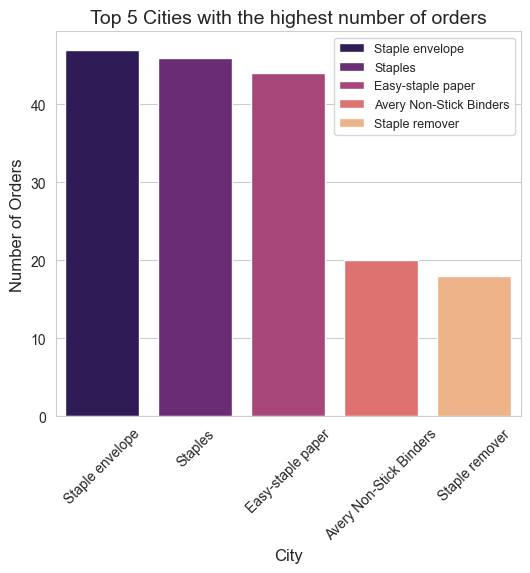

In [197]:
# Top 5 selling products 
top_5_prods = posh['Product Name'].value_counts().head(5)
print(f'The top 5 selling products are \n{top_5_prods}') 

#Visualizing...
print(f'This can also be visualised in the graph below')
plt.figure(figsize = (6, 5))
sns.barplot(x = top_5_prods.index, y = top_5_prods.values, hue = top_5_prods.index, legend = True, palette = 'magma')
plt.title('Top 5 Cities with the highest number of orders', fontsize = 14)
plt.xlabel('City', fontsize = 12)
plt.ylabel('Number of Orders', fontsize = 12)
plt.xticks(rotation = 45)
plt.legend(fontsize = 9)
plt.show()


##  Customer Segmentation
**1. How are customers segmented based on the "Segment" column?**

In [198]:
cust_per_seg = posh['Segment'].unique()
print(f'How customers are segmented, {cust_per_seg}') 
no_of_cust_seg = posh['Segment'].value_counts()
print(no_of_cust_seg)


How customers are segmented, <StringArray>
['Consumer', 'Corporate', 'Home Office']
Length: 3, dtype: str
Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


**2. What is the average order value for each customer segment?**

The average order for each customer segment are 
Segment
Consumer       225.065777
Corporate      233.150720
Home Office    243.403309
Name: Sales, dtype: float64
This can also be visualised in the graph below


<Figure size 600x500 with 0 Axes>

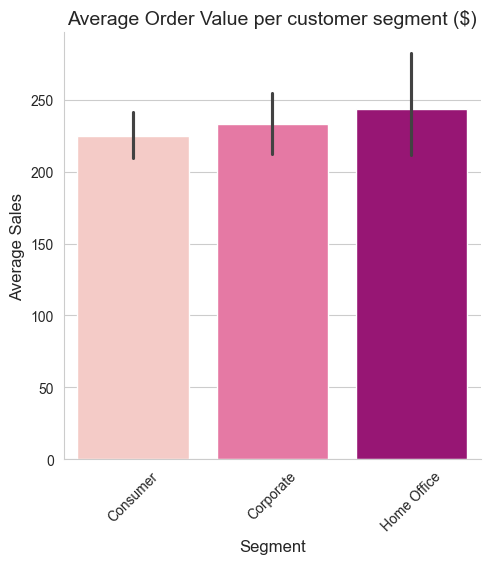

In [199]:
# Average Order Value for each customer segment
avg_order = posh.groupby(['Segment'])['Sales'].mean()
print(f'The average order for each customer segment are \n{avg_order}')

#Visualizing...
print(f'This can also be visualised in the graph below')
plt.figure(figsize = (6, 5))
sns.catplot(x = 'Segment', y = 'Sales', data = posh, kind = 'bar', hue = 'Segment', palette = 'RdPu')
plt.title('Average Order Value per customer segment ($)', fontsize = 14)
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Average Sales', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()

##  Shipping Insights
**1. What are the different shipping modes available?**

In [200]:
uniq_ship = posh['Ship Mode'].unique()
print(f'Different shipping modes available are: {uniq_ship}')

Different shipping modes available are: <StringArray>
['Second Class', 'First Class', 'Standard Class', 'Same Day']
Length: 4, dtype: str


**2. How does the shipping mode relate to the order date and delivery date?**

Average Shipping Time by Shipping Mode (in days)
Ship Mode
Same Day          0.044610
First Class       2.179214
Second Class      3.249211
Standard Class    5.008363
Name: Date Diff, dtype: float64


C:\Users\HomePC\AppData\Local\Temp\ipykernel_12164\2848663246.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=posh, x='Ship Mode', y='Date Diff', palette='Set3')


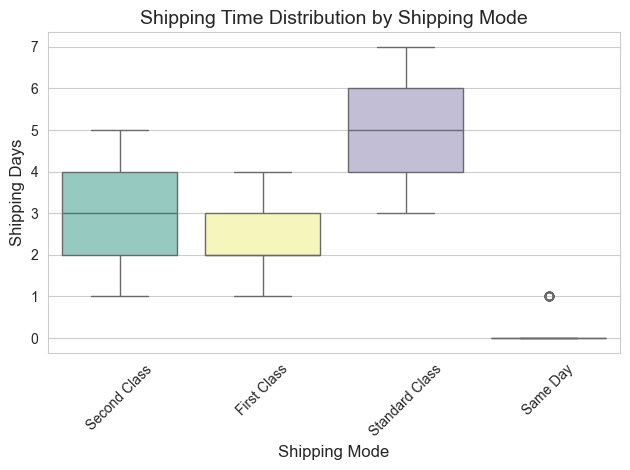

In [201]:
posh['Date Diff'] = (posh['Ship Date'] - posh['Order Date']).dt.days
    
avg_shipping_time = posh.groupby('Ship Mode')['Date Diff'].mean().sort_values()
print("Average Shipping Time by Shipping Mode (in days)")
print(avg_shipping_time)

# Visualizing...
sns.boxplot(data=posh, x='Ship Mode', y='Date Diff', palette='Set3')
plt.title('Shipping Time Distribution by Shipping Mode', fontsize=14)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Shipping Days', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3. Are there any patterns in shipping modes based on regions?**

The pattern is displayed below 
Region          Central  East  South  West
Ship Mode                                 
First Class         292   470    232   507
Same Day            118   154     83   183
Second Class        447   521    325   609
Standard Class     1420  1640    958  1841


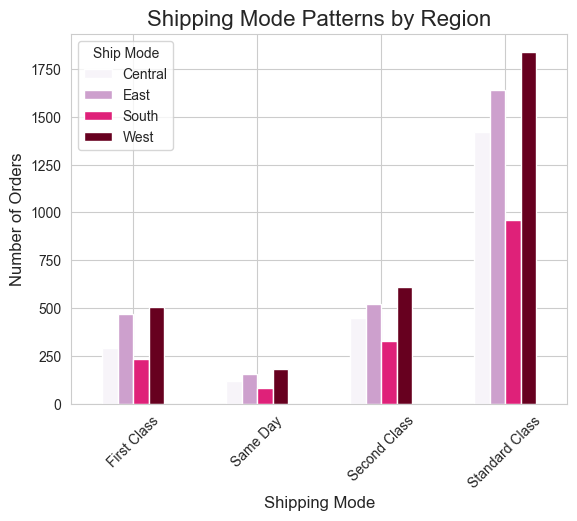

In [202]:
#Patterns in shipping mode based on regions
relate = pd.crosstab(posh['Ship Mode'], posh['Region'])
print(f'The pattern is displayed below \n{relate}')

#Visualizing...
relate.plot(kind='bar', stacked=False, colormap='PuRd')
plt.title('Shipping Mode Patterns by Region', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend(title='Ship Mode')
plt.xticks(rotation=45)
plt.show()

##  Sales Distribution
**1. What is the overall distribution of sales values?**

Numerical confirmation of the distribution 
count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


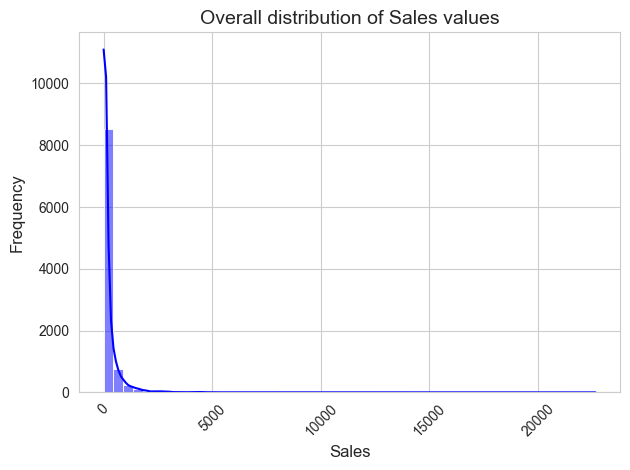

The Distribution of the Sales value is Right-Skewed


In [203]:
print(f'Numerical confirmation of the distribution \n{posh['Sales'].describe()}')

#Visualising...
sns.histplot(x = 'Sales', data = posh, bins = 50, kde = True, color = 'blue')
plt.title('Overall distribution of Sales values', fontsize = 14)
plt.xlabel('Sales', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

print(f'The Distribution of the Sales value is Right-Skewed')

**2. Are there any outliers in the sales data?**

In [204]:
from scipy import stats
dist = posh['Sales'].describe()
iqr = dist.values[6] - dist.values[4]

upper = dist.values[6] + (1.5 * iqr)
lower = dist.values[4] + (1.5 * iqr)

outliers = posh[(posh['Sales'] < lower) | (posh['Sales'] > upper)]
display(outliers)

print(f'There are {outliers.shape[0]} outliers in the dataset.')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Date Diff
0,9261,CA-2018-167976,2018-11-11,2018-11-14,Second Class,JL-15505,Jeremy Lonsdale,Consumer,United States,Aberdeen,South Dakota,57401,Central,OFF-SU-10004661,Office Supplies,Supplies,Acme Titanium Bonded Scissors,25.500,3
1,6990,CA-2018-165099,2018-12-11,2018-12-13,First Class,DK-13375,Dennis Kane,Consumer,United States,Abilene,Texas,79605,Central,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,1.392,2
2,201,CA-2018-105074,2018-06-24,2018-06-29,Standard Class,MB-17305,Maria Bertelson,Consumer,United States,Akron,Ohio,44312,East,OFF-PA-10002666,Office Supplies,Paper,Southworth 25% Cotton Linen-Finish Paper & Env...,21.744,5
3,454,CA-2018-147277,2018-10-20,2018-10-24,Standard Class,EB-13705,Ed Braxton,Corporate,United States,Akron,Ohio,44312,East,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,284.364,4
4,455,CA-2018-147277,2018-10-20,2018-10-24,Standard Class,EB-13705,Ed Braxton,Corporate,United States,Akron,Ohio,44312,East,OFF-ST-10000142,Office Supplies,Storage,Deluxe Rollaway Locking File with Drawer,665.408,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,3348,CA-2016-112014,2016-08-13,2016-08-20,Standard Class,ON-18715,Odella Nelson,Corporate,United States,Yucaipa,California,92399,West,OFF-AR-10003156,Office Supplies,Art,50 Colored Long Pencils,50.800,7
9796,4823,CA-2017-134222,2017-07-10,2017-07-11,Same Day,NZ-18565,Nick Zandusky,Home Office,United States,Yuma,Arizona,85364,West,OFF-BI-10001658,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,44.856,1
9797,7280,CA-2017-108224,2017-05-14,2017-05-14,Same Day,TH-21235,Tiffany House,Corporate,United States,Yuma,Arizona,85364,West,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,185.528,0
9798,7282,CA-2018-159282,2018-10-16,2018-10-21,Standard Class,GH-14410,Gary Hansen,Home Office,United States,Yuma,Arizona,85364,West,TEC-MA-10001148,Technology,Machines,Swingline SM12-08 MicroCut Jam Free Shredder,599.985,5


There are 9117 outliers in the dataset.


**3. Can you visualize the distribution of sales for each product category?**

Category
Furniture          182.610
Office Supplies     27.360
Technology         167.944
Name: Sales, dtype: float64


C:\Users\HomePC\AppData\Local\Temp\ipykernel_12164\4015153875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Category', y = 'Sales', data = posh, palette = 'muted')


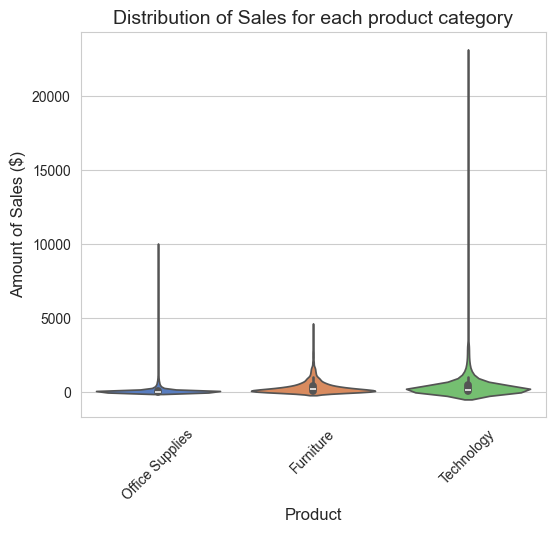

In [205]:
print(posh.groupby('Category')['Sales'].median())

#Visualizing...
plt.figure(figsize = (6, 5))
sns.violinplot(x = 'Category', y = 'Sales', data = posh, palette = 'muted')
plt.title('Distribution of Sales for each product category', fontsize = 14)
plt.xlabel('Product', fontsize = 12)
plt.ylabel('Amount of Sales ($)', fontsize = 12)
plt.xticks(rotation = 45)
plt.show()


##  Profit Analysis
**There is no much information to compute this category.**

## Project Deliverables
### Summary of key findings

* The dataset contains 18 columns of various data types and 9800 rows.

* The dataset spans a period of 1457 days.

* During this period, 4922 unique orders were made and recorded from 793 unique customers.

* The data was acquired from the United States with no duplicate records. 

* Although, there were 11 missing values in the Postal Code column, all of which were associated with Burlington, Vermount (East).

* The Top 5 cities with the highest number of orders are New York City, Los Angeles, Philadelphia, San Francisco and Seattle (ranked accordingly as displyed in the bar chart).

* Order distribution across regions shows that the West region records the highest number of orders with 3140 orders and South with the lowest, suggesting weaker demand or lower market penetration.

* The dataset contains three unique product categories. Based on total sales value, Technology generates the highest sales with `$827,455.8730` and Office Supplies, the lowest with `$705,422.3340`

* The Top 5 selling products are Staple envelope, Staples, Easy-staple paper, Avery Non-Stick Binders and Staple remover          

* Customers are segmented into Consumers, Corporate and Home Office. Consumers are the most dominant customer segment with the least average order value while Home Office is the least dominant customer segment with the highest average order value.

* The different shipping modes available in this dataset are Second Class, First Class, Standard Class, Same Day.

* Standard Class shipping has the longest mean delivery time (approximately 5 days), while Same day shipping has a delivery time of 0 days. First and Second class shipping are 2 and 3 days approximately.

* Analysis of the Order counts by shipping modes shows that customers prefer Standard Class shipping option and barely use the Same Day option, likely due to higher cost.

* The overall distribution of sales is right-skewed with a mean of approximately `$230.77` which is substantially greater than the median of `$54.49`.

* There is presence of extreme high-value and low-value outliers. 9117 outliers were identified in the dataset.

* The Furniture category has the highest median sales value, this means that the middle furniture order costs more money than any other category order.

* Overall, the data quality is good.

